In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
appClean = pd.read_csv("updated_appData.csv")  # Reading the updated dataset in the csv

In [3]:
#Dropping Columns not necessary for analysis
appClean.drop(columns=['Last Updated Formatted', 'KB', 'Installs', 'Minimum Age Requirement'], inplace=True)

In [4]:
appClean.head()

,App,Category,Rating,Reviews,Paid or Free,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0,0.0


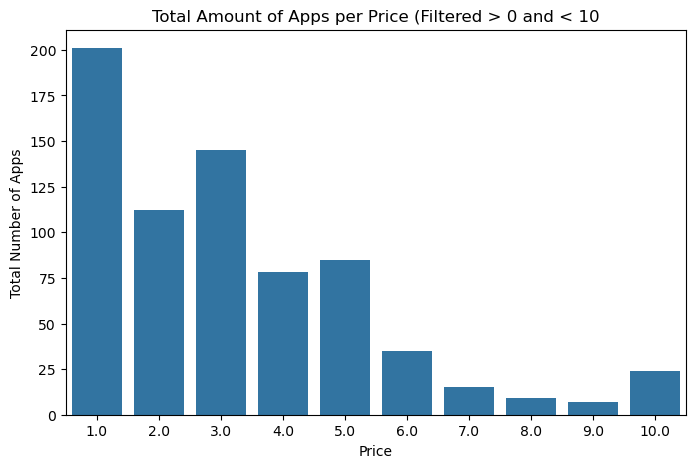

In [5]:
#Round the price values to the nearest whole number
appClean['Rounded Price'] = appClean['Price'].round()

#Filter out values greater than 10 and equal to 0
filtered_prices = appClean[(appClean['Rounded Price'] <= 10) & (appClean['Rounded Price'] > 0)]

#Count the total amounts per price
price_counts = filtered_prices['Rounded Price'].value_counts().sort_index()

#Create a bar graph for total amounts per price
plt.figure(figsize=(8, 5))
sns.barplot(x=price_counts.index, y=price_counts.values)

#Set titles and labels
plt.title('Total Amount of Apps per Price (Filtered > 0 and < 10')
plt.xlabel('Price')
plt.ylabel('Total Number of Apps')

# Show the plot
plt.show()

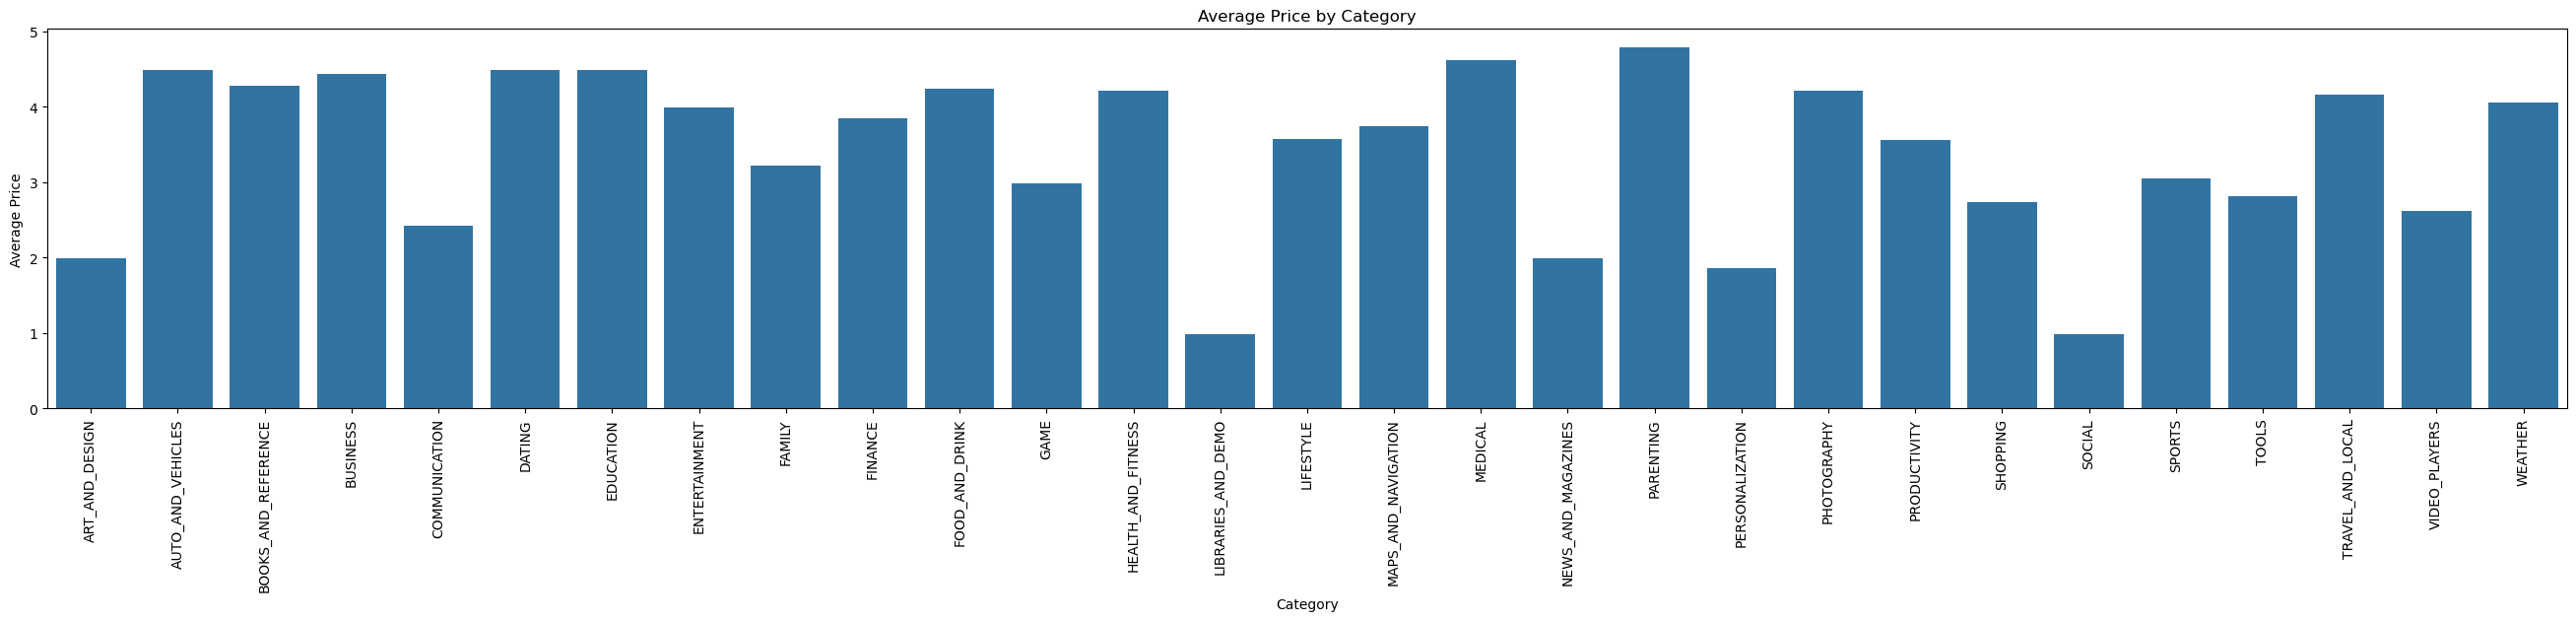

In [6]:
#Filter out prices > 10 and = 0
filtered_apps = appClean[(appClean['Price'] > 0) & (appClean['Price'] <= 10)]

#Calculate the average price by category
average_price_by_category = filtered_apps.groupby('Category')['Price'].mean().reset_index()

#Create a bar graph for average price by category
plt.figure(figsize=(33, 5))
sns.barplot(x='Category', y='Price', data=average_price_by_category)

#Set titles and labels
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [7]:
# Replace numeric values with categorical labels
appClean['Paid or Free'] = appClean['Paid or Free'].replace({0: 'Free', 10: 'Paid'})

# Convert the column to a categorical type
appClean['Paid or Free'] = pd.Categorical(appClean['Paid or Free'])

# Display the updated DataFrame
appClean.head()

,App,Category,Rating,Reviews,Paid or Free,Price,Rounded Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,Free,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,Free,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,Free,0.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,Free,0.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,Free,0.0,0.0


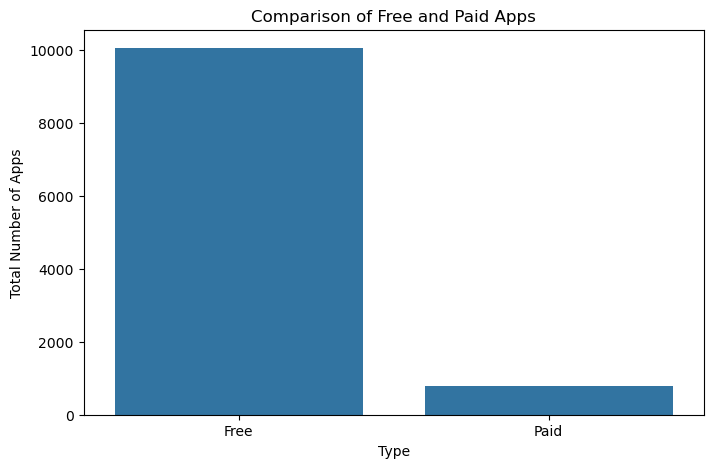

In [8]:
# Count the total number of Free and Paid apps
counts = appClean['Paid or Free'].value_counts()

# Create a bar chart for comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=counts.index, y=counts.values)  # Removed palette parameter

# Set titles and labels
plt.title('Comparison of Free and Paid Apps')
plt.xlabel('Type')
plt.ylabel('Total Number of Apps')

# Show the plot
plt.show()

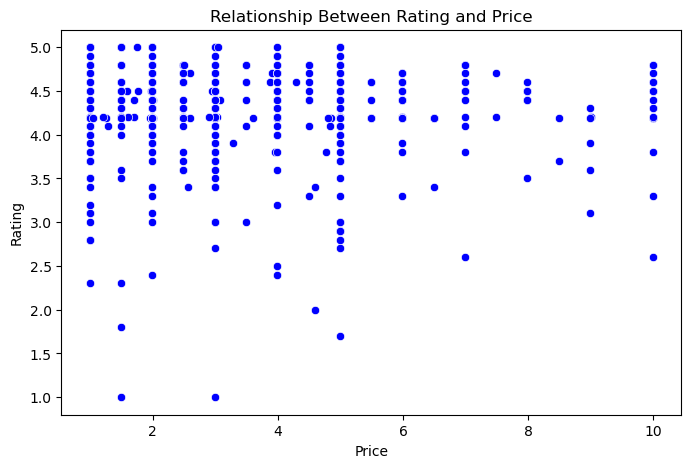

In [9]:
#Filter out prices > 10 and = 0 (if needed)
filtered_apps = appClean[(appClean['Price'] > 0) & (appClean['Price'] <= 10)]

#Create a scatter plot for the relationship between Rating and Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Price', y='Rating', data=filtered_apps, color='blue', marker='o')

#Set titles and labels
plt.title('Relationship Between Rating and Price')
plt.xlabel('Price')
plt.ylabel('Rating')

# Show the plot
plt.show()